# Astute_Farms
code for "Xilinx Innovation Challenge"
Team id: 
This code can run over your Pynq-Z2 

In [21]:
!dir ./bitstream

axi_gpio.bit  ps_gpio.bit  pynq_tutorial.bit  resize.bit
axi_gpio.tcl  ps_gpio.tcl  pynq_tutorial.tcl  resize.tcl


In [22]:
# Make sure the base overlay is loaded
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")
from pynq import Overlay

In [26]:
from pynq.lib.arduino import Arduino_Analog
from pynq.lib.arduino import ARDUINO_GROVE_A1
from pynq.lib.arduino import ARDUINO_GROVE_A2
from pynq.lib.arduino import ARDUINO_GROVE_A3
from pynq.lib.arduino import ARDUINO_GROVE_A4



analog1 = Arduino_Analog(base.ARDUINO,ARDUINO_GROVE_A1)
analog2 = Arduino_Analog(base.ARDUINO,ARDUINO_GROVE_A2)
analog3 = Arduino_Analog(base.ARDUINO,ARDUINO_GROVE_A3)
analog4 = Arduino_Analog(base.ARDUINO,ARDUINO_GROVE_A4)

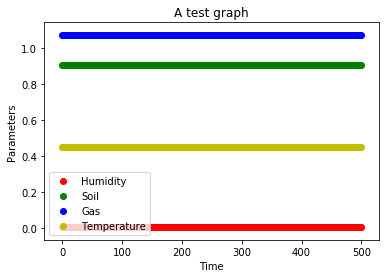

In [32]:
import time
import matplotlib.pyplot as plt
x=[]
y=[]
z=[]
w=[]
v=[]
u=[]
labels=['Humidity', 'Soil', 'Gas', 'Temperature']
colors=['r','g','b', 'y']
for i in range (0, 500):
    x.append(i)
    y.append(analog1.read()[1])
    z.append(analog2.read()[1])
    w.append(analog3.read()[1])
    v.append(analog4.read()[1])
   # plt.show()
    time.sleep(0.01)
u.append(y)
u.append(z)
u.append(w)
u.append(v)
plt.xlabel("Time")
plt.ylabel("Parameters")
plt.title("A test graph")
for j in range(len(u)):
    plt.scatter(x,u[j], color=colors[j], label=labels[j])
plt.legend()
plt.show()

In [28]:
print(y[5999])
print(z[5999])
print(w[5999])
print(v[5999])

2.5175
0.007
0.9408
0.4571


In [19]:
from pynq import Overlay
ps_gpio_design = Overlay("./bitstream/ps_gpio.bit")

In [7]:
from pynq import GPIO 

In [8]:
led0 = GPIO(GPIO.get_gpio_pin(6), 'out')
led1 = GPIO(GPIO.get_gpio_pin(7), 'out')
led2 = GPIO(GPIO.get_gpio_pin(8), 'out')
led3 = GPIO(GPIO.get_gpio_pin(9), 'out')

In [13]:
if y[999]>2.8:
    led0.write(1)
if z[999]>1.0:
    led1.write(1)
if w[999]>1.5:
    led2.write(1)
if v[999]>0.450:
    led3.write(1)

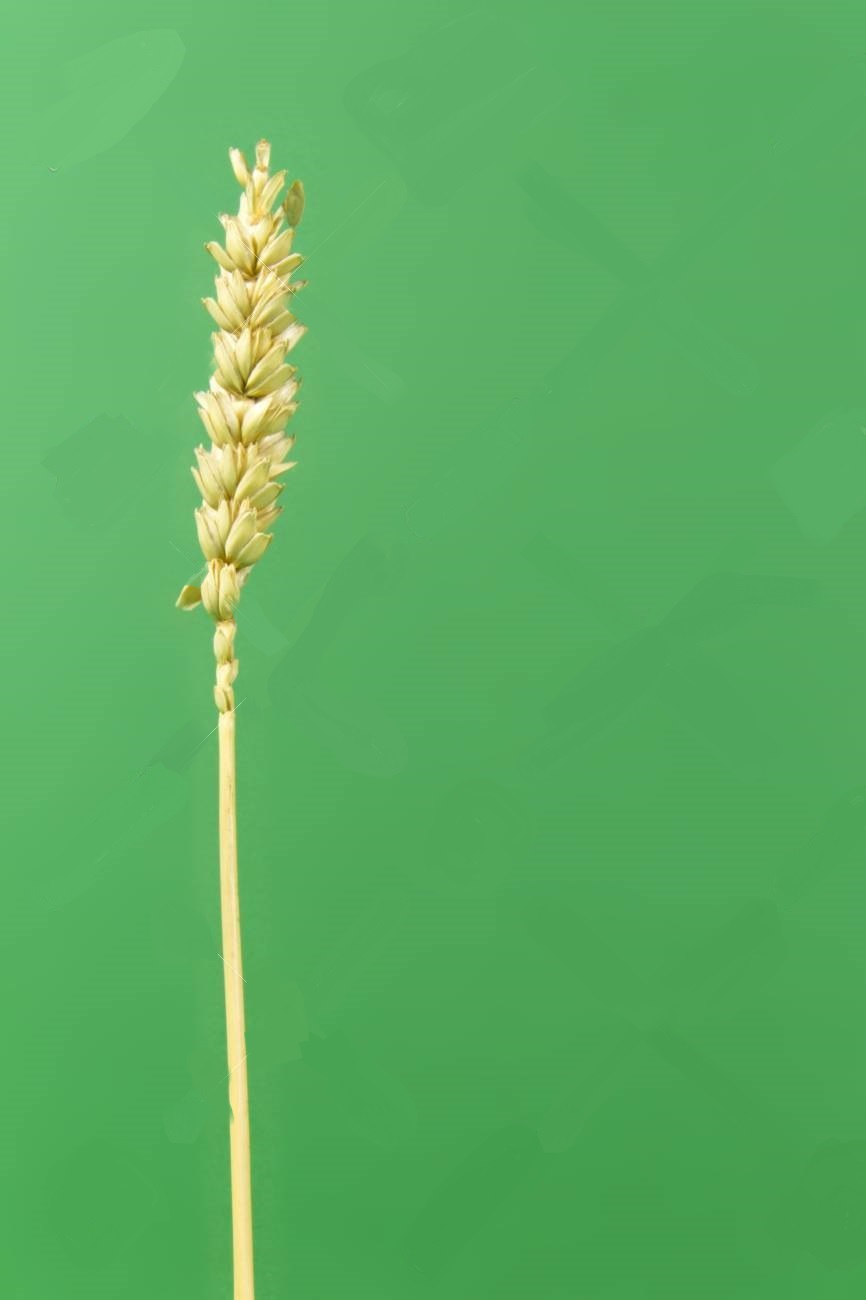

In [15]:
from PIL import Image as PIL_Image

orig_img_path = '/home/xilinx/jupyter_notebooks/xilinx_final_code_astute_farms/data/object_of_interest.jpg'


img1 = PIL_Image.open(orig_img_path)
img1

(866, 1300)


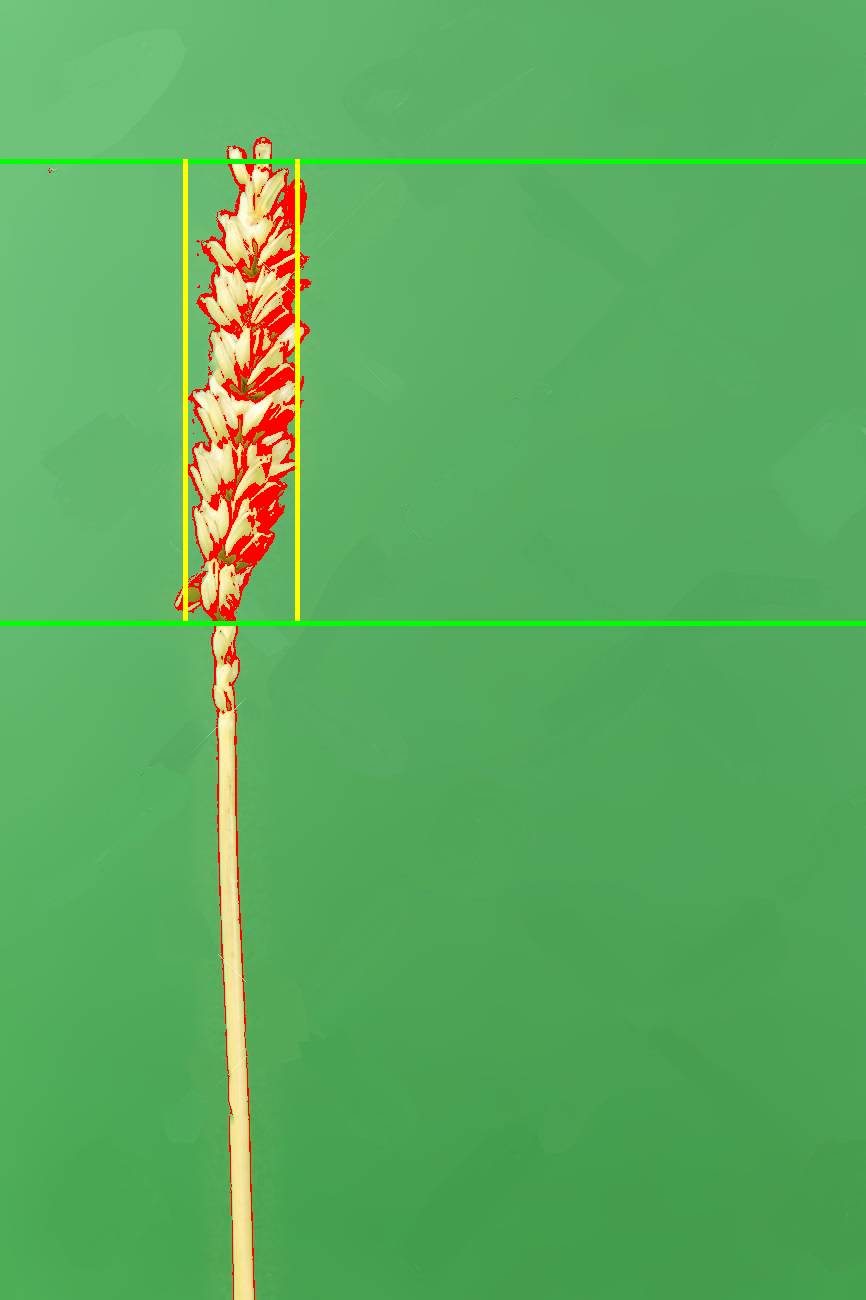

In [16]:
from PIL import Image as PIL_Image

orig_img_path = '/home/xilinx/jupyter_notebooks/xilinx_final_code_astute_farms/data/object_of_interest.jpg'


img = PIL_Image.open(orig_img_path)
pix = img.load()
s=img.size
print(s)
a=0
b=0
e=0
f=0
mini=10000
maxi=0
for j in range (0, s[1]):
    c=0
    for i in range (0, s[0]):
        if pix[i, j][0]<=215 and pix[i, j][0]>=115 and pix[i, j][1]<=192 and pix[i, j][1]>=92 and pix[i, j][2]<=149 and pix[i, j][2]>=49:
            #c=c+abs((pix[i, j][0]-pix[i, j][1])-23)+abs((pix[i, j][1]-pix[i, j][2])-43)
            c=c+1
            pix[i,j] =(255, 0, 0)
    if c>s[0]/50:
        if b==0:
            a=j
            b=1
        #print('if',c, j)
    if c<s[0]/200 and b==1:   #make this 200 finally 
        if e==0:
            f=j
            e=1
        #print('else',c, j)
for j in range (a-5, a):
    for i in range (0, s[0]):
        pix[i, j]=(0, 255, 0)
for i in range (0, s[0]-10):
    d=0
    for j in range (0, 10):
        if pix[i+j, (a+f)//2]==(255, 0, 0):
            d=d+1
    if d>2:
        mini=min(i, mini)
        maxi=max(i, maxi)
        #print(d)
        #print(i)
for i in range (mini+5, mini+10):
    for t in range (0, f-a):
        pix[i-5, a+t-5]=(255, 255, 0)
for i in range (maxi+5, maxi+10):
    for t in range (0, f-a):
        pix[i-5, a+t-5]=(255, 255, 0)
for j in range (-5+f, f):
    for i in range (0, s[0]):
        pix[i, j]=(0, 255, 0)
img

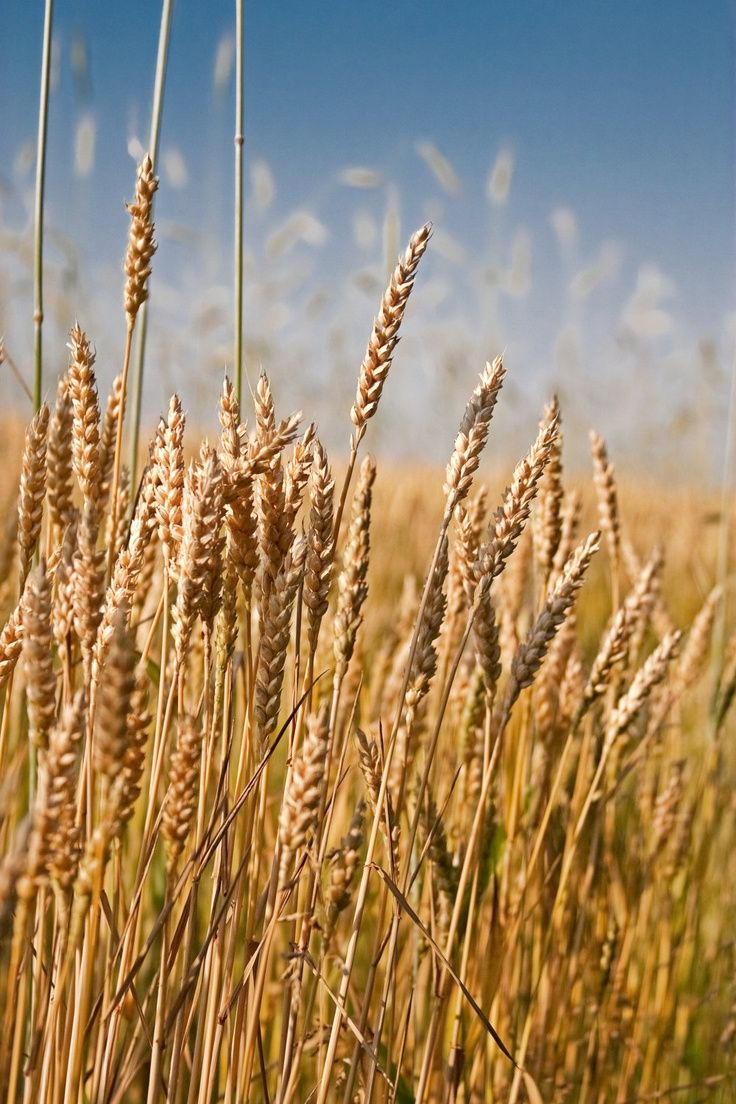

In [17]:
orig_img_path = '/home/xilinx/jupyter_notebooks/xilinx_final_code_astute_farms/data/plant_growth_detection.jpg'


img2 = PIL_Image.open(orig_img_path)
img2

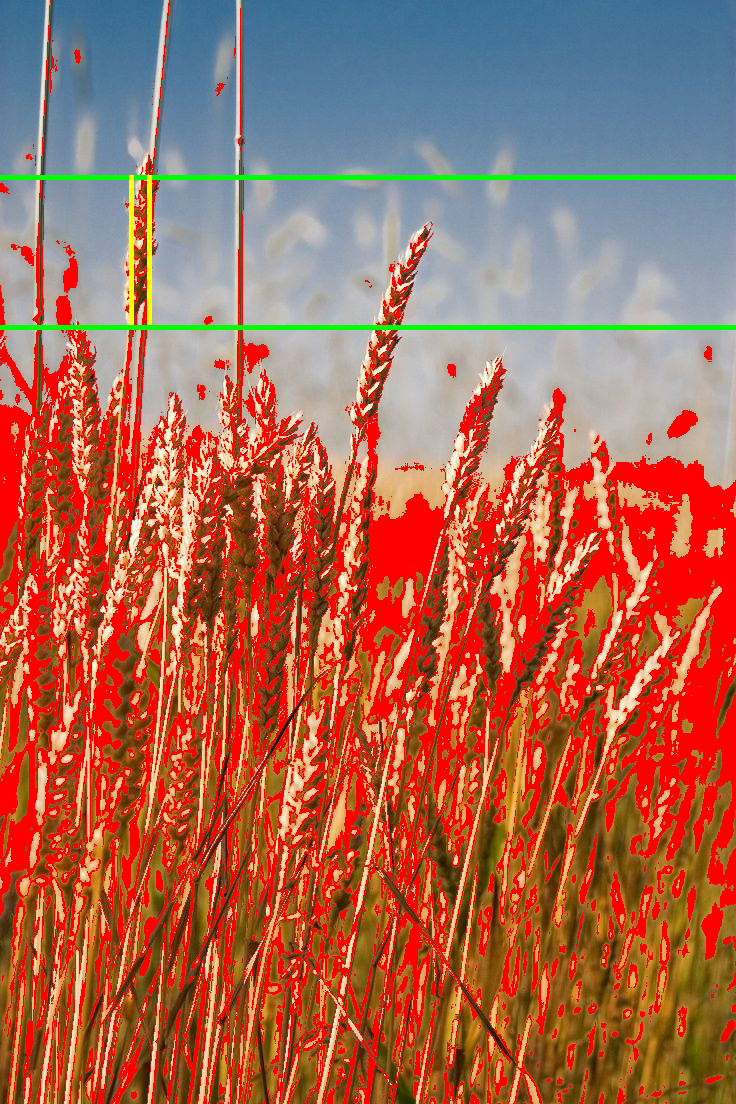

In [18]:
orig_img_path = '/home/xilinx/jupyter_notebooks/xilinx_final_code_astute_farms/data/testimage03.png'


img3 = PIL_Image.open(orig_img_path)
img3

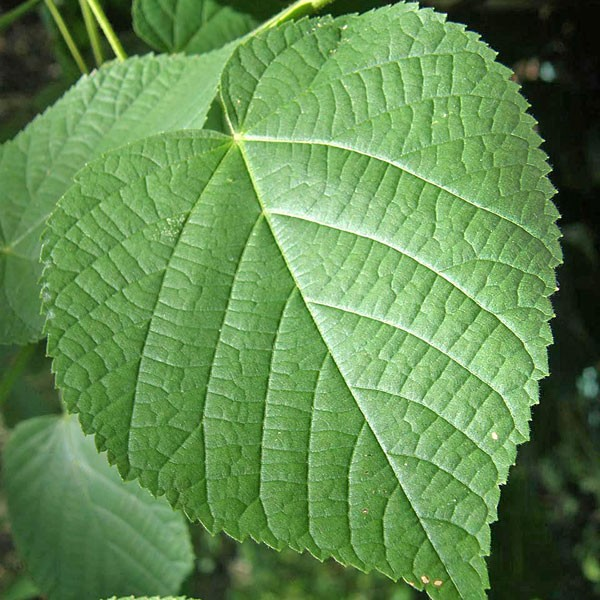

In [19]:
orig_img_path = '/home/xilinx/jupyter_notebooks/xilinx_final_code_astute_farms/data/plant_without_disease.jpg'


img4 = PIL_Image.open(orig_img_path)
img4

(600, 600)
0
healthy leaf!


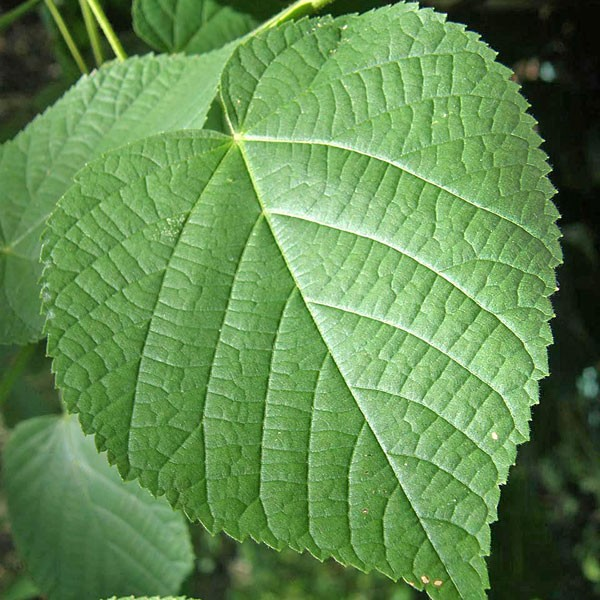

In [20]:
from PIL import Image as PIL_Image

orig_imag_path = '/home/xilinx/jupyter_notebooks/xilinx_final_code_astute_farms/data/plant_without_disease.jpg'
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null

imag = PIL_Image.open(orig_imag_path)
pix = imag.load()
s=imag.size
c=0
x=0
y=0
print(s)
for j in range (0, s[1]):
    for i in range (0, s[0]):
        if pix[i, j][0]<=169 and pix[i, j][0]>=119 and pix[i, j][1]<=99 and pix[i, j][1]>=49 and pix[i, j][2]<=49 and pix[i, j][2]>=0:
            #c=c+abs((pix[i, j][0]-pix[i, j][1])-23)+abs((pix[i, j][1]-pix[i, j][2])-43)
            c=c+1
            pix[i,j] =(255, 0, 0)
print(c)
if c<s[0]*s[1]*0.001:
    print("healthy leaf!")
else:
    print("diseased leaf!")
    x=1
imag

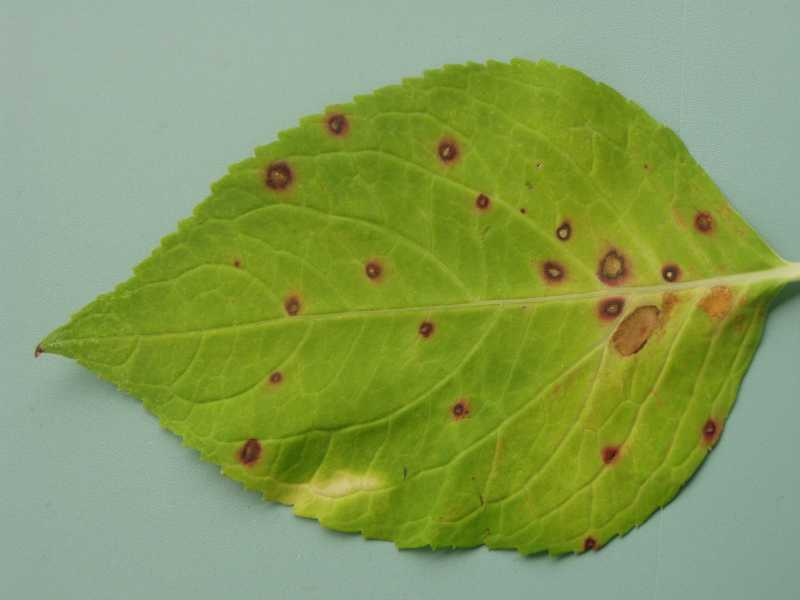

In [21]:
orig_img_path = '/home/xilinx/jupyter_notebooks/xilinx_final_code_astute_farms/data/Leaf_Spot_of_Trees669.jpg'
img5 = PIL_Image.open(orig_img_path)
img5


(800, 600)
1726
diseased leaf!


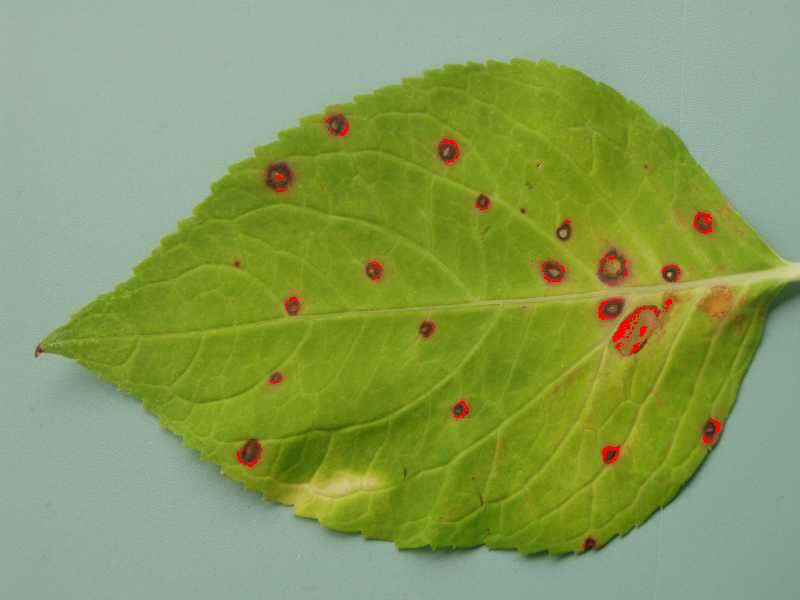

In [22]:
from PIL import Image as PIL_Image

orig_imag_path = '/home/xilinx/jupyter_notebooks/xilinx_final_code_astute_farms/data/Leaf_Spot_of_Trees669.jpg'
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null

imag = PIL_Image.open(orig_imag_path)
pix = imag.load()
s=imag.size
c=0
print(s)
for j in range (0, s[1]):
    for i in range (0, s[0]):
        if pix[i, j][0]<=169 and pix[i, j][0]>=119 and pix[i, j][1]<=99 and pix[i, j][1]>=49 and pix[i, j][2]<=49 and pix[i, j][2]>=0:
            #c=c+abs((pix[i, j][0]-pix[i, j][1])-23)+abs((pix[i, j][1]-pix[i, j][2])-43)
            c=c+1
            pix[i,j] =(255, 0, 0)
print(c)
if c<s[0]*s[1]*0.001:
    print("healthy leaf!")
else:
    print("diseased leaf!")
    y=1
imag

In [24]:
if x==1:
    led0.write(1) #leds 0 and 1 glow if second image is diseased
    led1.write(1)
if y==1:
    led2.write(1) #leds 2 and 3 glow if second image is diseased
    led3.write(1)